<table>
<tr><td><img style="height: 150px;" src="images/geo_hydro1.jpg"></td>
<td bgcolor="#FFFFFF">
    <p style="font-size: xx-large; font-weight: 900; line-height: 100%">AG Dynamics of the Earth</p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);">Jupyter notebooks</p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);">Georg Kaufmann</p>
    </td>
</tr>
</table>

# Numerical methods: 6. Integration
## Gauss quadrature integration method
----
*Georg Kaufmann,
Geophysics Section,
Institute of Geological Sciences,
Freie Universität Berlin,
Germany*

In this notebook, we extend the simple integration rules to the Gauss quadrature rules by sub-dividing the
integral interval $[a,b]$ into $n$ sub-intervals, which follow a **non-linear spacing** defined by the roots
of the **Legendre polynomials**.

First, we load the standrd `python` libraries.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets

## Function

We first define the function $f$, which we want to integrate between $x \in [a,b]$:
$$
\int\limits_a^b f(x) dx
$$

Example:
$$
\int\limits_{0}^{\pi} \sin x dx
= \left[-\cos x \right]_{0}^{\pi}
= -\cos (\pi) - (-\cos 0)
= -(-1) + 1
= 2
$$

In [2]:
def int_f(x):
    '''
    #----------------------------------------------------------------------
    # function f(x)
    #----------------------------------------------------------------------
    '''
    int_f = np.sin(x)
    return int_f

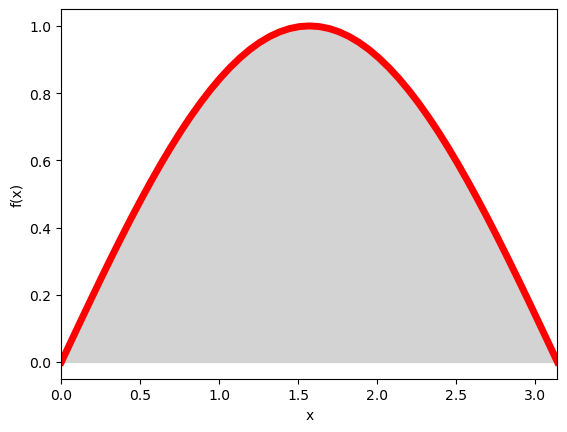

In [3]:
a = 0.
b = np.pi
x = np.linspace(a,b,51)
y = int_f(x)

plt.xlabel('x')
plt.ylabel('f(x)')
plt.xlim([a,b])
#plt.ylim([-0.1,1.1])
plt.fill_between(x,y,linewidth=1,color='lightgrey')
plt.plot(x,y,linewidth=5,color='red',label='sin(x)')

## Legendre polynomials

To approximate the integral, we use the **Gauss quadrature**:
$$
 \int\limits_a^b f(x) dx 
 = \sum\limits_{i=1}^{n} c_i f(x_{i}) + R_n
$$

The **sampling points** $x_i$ and the **weights** $c_i$ need to be calculated first.

For the sampling points $x_i$, we need to introduce the **Legendre polynomials** $P_n(x)$, 
defined on the interval $[-1,1]$ which can be calculated recursively from the relation:
$$
(n+1) P_{n+1}(x) = (2n+1) x P_{n}(x) - n P_{n-1}(x)
$$
For the first two Legendre polynomials, we use:
$$
\begin{array}{rcl}
 P_0(x) & = & 1 \\
 P_1(x) & = & x \\
\end{array}
$$

Here, we use the `legendre` module from the `scipy.special` package to plot the first $nmax$
Legendre polynomials. Note that the degree $n$ defines the **number of roots** of $P_n$!

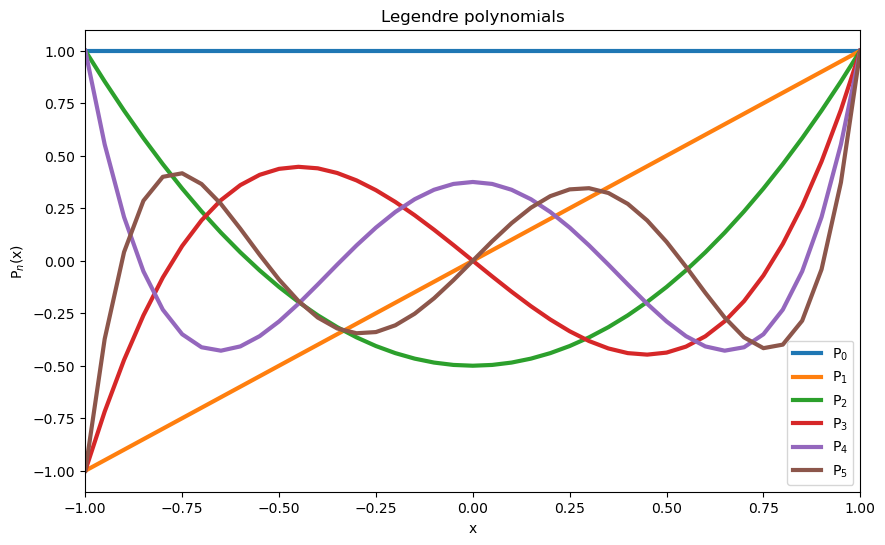

In [4]:
from scipy.special import legendre

nmax=6
plt.figure(figsize=(10,6))
plt.xlim([-1.,1.])
plt.ylim([-1.1,1.1])
plt.xlabel('x')
plt.ylabel('P$_n$(x)')
plt.title('Legendre polynomials')
for n in range(nmax):
    Pn=legendre(n)
    #print(Pn)
    x=np.linspace(-1.,1.,41)
    plt.plot(x,Pn(x),linewidth=3,label='P$_{'+str(n)+'}$')
plt.legend()

To find the **roots** $x_i$ of $P_n(x)$, we have to use a root-searching algorithm. 
The **weights** $c_i(x)$ are defined as:
$$
c_i(x) = \int\limits_{-1}^{1} \prod\limits_{j=1, j \ne i}^{n} 
       \left( \frac{x-x_j}{x_i-x_j} \right) dx, \quad i=1,\dots,n
$$

We use the `leggauss` module from the `numpy.polynomial.legendre` package to find both
roots and weights:

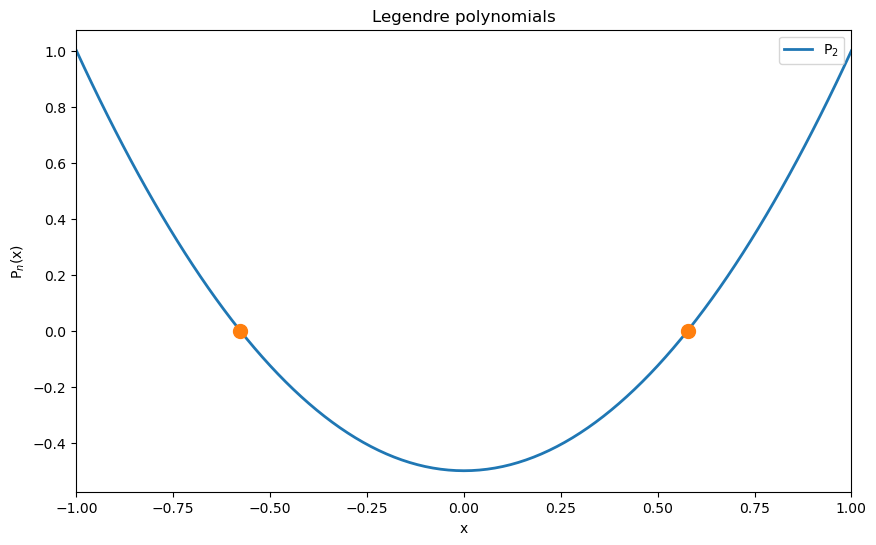

In [7]:
from numpy.polynomial.legendre import leggauss

def root_and_weights(n=10):
    xroot,croot =leggauss(n)
    #print('x0: ',xroot)
    #print('c:  ',croot)

    plt.figure(figsize=(10,6))
    plt.xlim([-1.,1.])
    plt.xlabel('x')
    plt.ylabel('P$_n$(x)')
    plt.title('Legendre polynomials')
    Pn=legendre(n)
    x=np.linspace(-1.,1.,101)
    plt.plot(x,Pn(x),linewidth=2,label='P$_{'+str(n)+'}$')
    plt.plot(xroot,[0 for i in range(n)],marker='o',markersize=10,linewidth=0)
    plt.legend()
    
root_and_weights(2)

In [8]:
# call interactive module
w = dict(
n=widgets.IntSlider(min=1,max=20,step=1,value=1,description='n'))

output = widgets.interactive_output(root_and_weights, w)
box = widgets.VBox([widgets.HBox([*w.values()]), output])
display(box)

## Gauss quadrature

Now we can define the Gauss quadrature integration as function.
$$
 \int\limits_a^b f(x) dx 
 = \sum\limits_{i=1}^{n} c_i f(x_{i}) + R_n
$$

We compare our method with two in-build `python` methods, `scipy.integrate.simps` and
`scipy.integrate.quadrature`.

In [9]:
def int_gauss(f,a,b,n):
    from numpy.polynomial.legendre import leggauss
    xroot,croot =leggauss(n)
    int_gauss = 0.
    for i in range(1,n+1):
        xx = ((b-a)*xroot[i-1]+a+b)/2.
        int_gauss = int_gauss + croot[i-1]*f(xx)
    int_gauss = (b-a) / 2. * int_gauss
    return int_gauss 

In [12]:
import scipy.integrate
print ("%12s%12.2f%12.2f" % ('[a,b]:   ',a,b))
print ("%12s%12s%12s%12s" % (
          '           n',
          '  PythonSimp',
          '       Gauss',
          ' PythonGauss'))
#-----------------------------------------------------------------------
# call integration method
#-----------------------------------------------------------------------
int = np.zeros(3)
for n in np.arange(2,18,2):
    x = np.linspace(a,b,n)
    y = int_f(x)
    int[0] = scipy.integrate.simps (y,x,even='avg')
    int[1] = int_gauss(int_f,a,b,n)
    [int[2],err] = scipy.integrate.quadrature (int_f,a,b,maxiter=30)
    print ("%9s%3i%12.4f%12.4f%12.4f" % ('',n,int[0],int[1],int[2]))

   [a,b]:           0.00        3.14
           n  PythonSimp       Gauss PythonGauss
           2      0.0000      1.9358      2.0000
           4      1.9649      2.0000      2.0000
           6      1.9953      2.0000      2.0000
           8      1.9988      2.0000      2.0000
          10      1.9995      2.0000      2.0000
          12      1.9998      2.0000      2.0000
          14      1.9999      2.0000      2.0000
          16      1.9999      2.0000      2.0000


[next >](Numerics_lab06_romberg.ipynb)